In [18]:
import pandas as pd

In [19]:
df_salaries = pd.read_csv('../data/ds_salaries.csv')
df_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [20]:
# df_salaries.drop('Unnamed: 0', axis=1, inplace=True)

In [21]:
df_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [22]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [23]:
df_salaries.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [24]:
df_salaries.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [25]:
df_salaries.to_csv('../data/ds_salaries.csv', index=False)

In [26]:
df_salaries.company_size.value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

> company_size를 타겟으로 쓰고싶다면, M과 나머지로 구분해서 사용하기

In [27]:
df_salaries.company_location.value_counts()

US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
AT      4
PT      4
PL      4
LU      3
PK      3
BR      3
AE      3
MX      3
AU      3
TR      3
DK      3
IT      2
CZ      2
SI      2
RU      2
CH      2
NG      2
CN      2
BE      2
VN      1
EE      1
AS      1
DZ      1
MY      1
MD      1
KE      1
SG      1
CO      1
IR      1
CL      1
MT      1
IL      1
UA      1
IQ      1
RO      1
HR      1
NZ      1
HU      1
HN      1
IE      1
Name: company_location, dtype: int64

> company_location을 타겟으로 쓰고싶다면, US와 나머지로 구분해서 사용하기 > 의미 없다.

In [28]:
df_salaries.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

> job_title을 타겟으로 쓰고싶다면, data scientist와 data engineer만 뽑아서 사용하기

# salary regression target test

In [29]:
sort_salary_usd = df_salaries.sort_values('salary_in_usd')
sort_salary_usd.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
176,2021,MI,FT,Data Scientist,58000,MXN,2859,MX,0,MX,S
185,2021,MI,FT,Data Engineer,4000,USD,4000,IR,100,IR,M
238,2021,EN,FT,Data Scientist,4000,USD,4000,VN,0,VN,M
77,2021,MI,PT,3D Computer Vision Researcher,400000,INR,5409,IN,50,IN,M
179,2021,MI,FT,Data Scientist,420000,INR,5679,IN,100,US,S


In [30]:
import matplotlib.pyplot as plt

In [31]:
sort_salary_usd.salary_in_usd

176      2859
185      4000
238      4000
77       5409
179      5679
        ...  
225    416000
157    423000
97     450000
33     450000
252    600000
Name: salary_in_usd, Length: 607, dtype: int64

In [32]:
dataScientist_salary = sort_salary_usd[sort_salary_usd['job_title']=='Data Scientist'].salary_in_usd

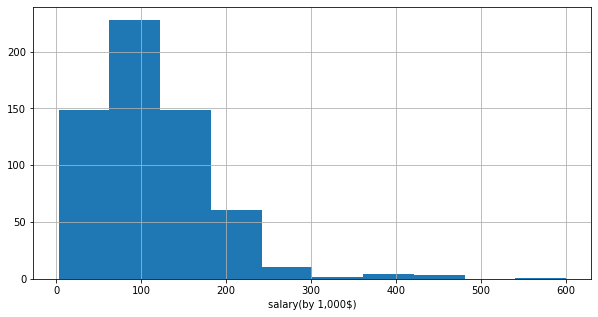

In [33]:
plt.figure(figsize=(10,5))
(sort_salary_usd['salary_in_usd']/1000).hist(
)
plt.xlabel('salary(by 1,000$)')

plt.show()

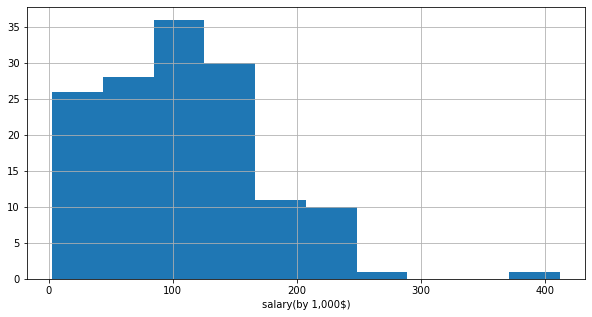

In [34]:
plt.figure(figsize=(10,5))
(dataScientist_salary/1000).hist(
)
plt.xlabel('salary(by 1,000$)')

plt.show()